# Market Basket Analysis

The objective of this notebook is to conduct a simple and educational analysis of the Market Basket Analysis dataset. This dataset is imported from Kaggle and has the following characteristics:

## Dataset Description

- **File name**: Assignment-1_Data
- **File format**: .xlsx
- **Number of Rows**: 522065
- **Number of Attributes**: 7

The attributes are as follows:


1. **TransactionID**: A 6-digit number assigned to each transaction. This is a nominal attribute.
2. **ProductName**: The product name. This is a nominal attribute.
3. **ProductQuantity**: The quantities of each product per transaction. This is a numeric attribute.
4. **TransactionDate**: The day and time when each transaction was generated. This is a numeric attribute.
5. **ProductPrice**: The product price. This is a numeric attribute.
6. **CustomerID**: A 5-digit number assigned to each customer. This is a nominal attribute.
7. **CustomerCountry**: The name of the country where each customer resides. This is a nominal attribute.


## Project Objective

The primary objective of the analysis is to uncover interesting patterns and insights about the dataset using the pandas library. The raw data is transformed into meaningful graphs that can provide valuable business insights, aid in decision-making processes, and reveal trends that may not be immediately apparent in the raw data.

## Personal Objective
This project serves as a way for me to further develop and refine my skills in MySQL, pandas, and Matplotlib. I look to enhance my technical abilities and proficiency in handling and visualizing large datasets.

## Importing the Libraries

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import geopandas as gpd
import plotly.express as px

## Importing the Data

The first step was to import the data from MySQL without any missing values into the notebook.

In [5]:
column_names = [
    "TransactionID",  # A 6-digit number assigned to each transaction
    "ProductName",    # The product name
    "ProductQuantity",  # The quantities of each product per transaction
    "TransactionDate",  # The day and time when each transaction was generated
    "ProductPrice",  # The product price
    "CustomerID",  # A 5-digit number assigned to each customer
    "CustomerCountry"  # The name of the country where each customer resides
]

df = pd.read_csv('clean_market_data.csv', names=column_names)

In [6]:
df.head()

,TransactionID,ProductName,ProductQuantity,TransactionDate,ProductPrice,CustomerID,CustomerCountry
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
3,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Adding additional column for the Total Transaction Value

I added the following column to the DataFrame:

**TotalTransactionValue**: ProductQuantity x ProductPrice

In [8]:
df['TotalTransactionValue'] = df['ProductQuantity'] * df['ProductPrice']
df.head()

,TransactionID,ProductName,ProductQuantity,TransactionDate,ProductPrice,CustomerID,CustomerCountry,TotalTransactionValue
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
2,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Top Items Bar Chart
Displays the frequency of the top N most frequently purchased items, providing a quick overview of the most popular items among all transactions.

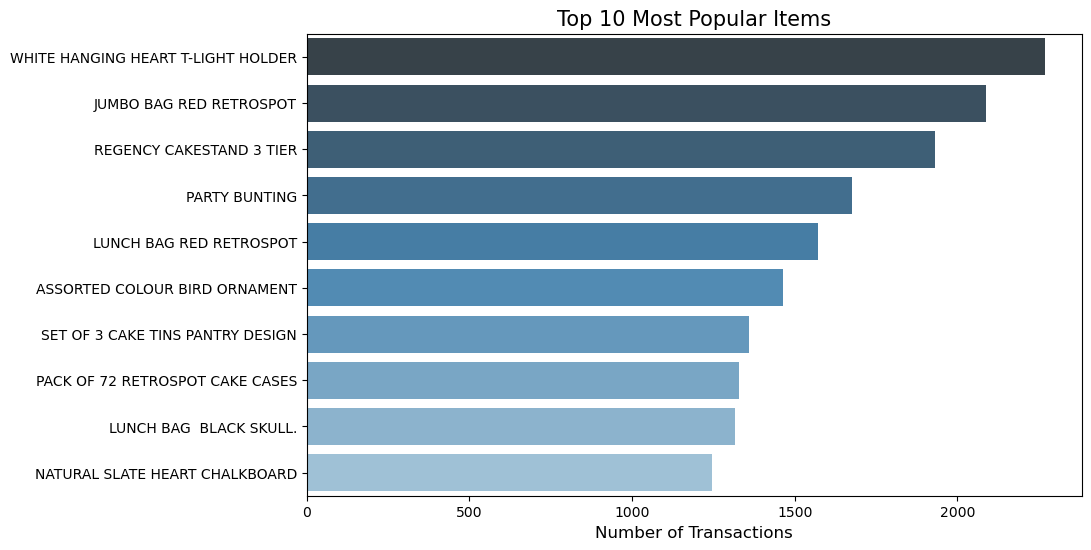

In [10]:
# Set the number of items to display
benchmark = 10

# Calculate the frequency of each item and take the top N items
top_items = df['ProductName'].value_counts()[:benchmark]

# Blue color palette with the same number of colors as items
palette = sns.color_palette("Blues_d", n_colors=benchmark)[::-1]

# Create the bar plot with the color palette
plt.figure(figsize=(10,6))
sns.barplot(y=top_items.index, x=top_items.values, orient='h', palette=palette)
plt.title(f'Top {benchmark} Most Popular Items', fontsize=15)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('')
plt.show()

## Sales Line Chart
Shows the monthly sales over time. It helps to understand the sales variation and identify any significant changes or trends.

C:\ProgramData\anaconda3\envs\homl3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\homl3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


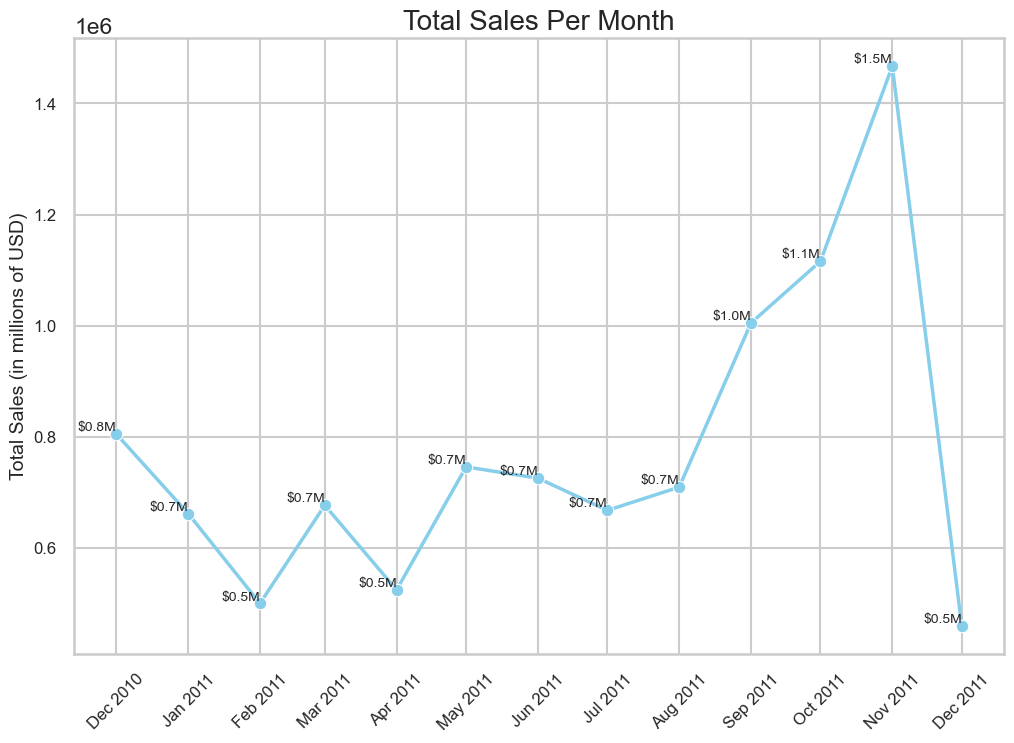

In [12]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


# Calculate the total sales per month
monthly_sales = df.groupby(df['TransactionDate'].dt.to_period('M'))['TotalTransactionValue'].sum()


# Convert PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()


# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("talk")


# Create the line plot with customized aesthetics
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=monthly_sales, marker='o', color='skyblue', linewidth=2.5)
plt.title('Total Sales Per Month', fontsize=20)
plt.xlabel('')
plt.ylabel('Total Sales (in millions of USD)', fontsize=14)  # Update y-axis label to indicate currency
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Display months and year in abbreviated format
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add data labels to the points in the line chart
for x, y in zip(monthly_sales.index, monthly_sales.values):
    ax.text(x, y, f'${y/1e6:.1f}M', ha='right', va='bottom', fontsize=10)  # Format the label as millions of USD

plt.show()

## Choropleth Map of Top Countries by Sales Volume
World map to show the distribution of the sales between the top countries. The number of countries shown can be changed by modifying the benchmark.

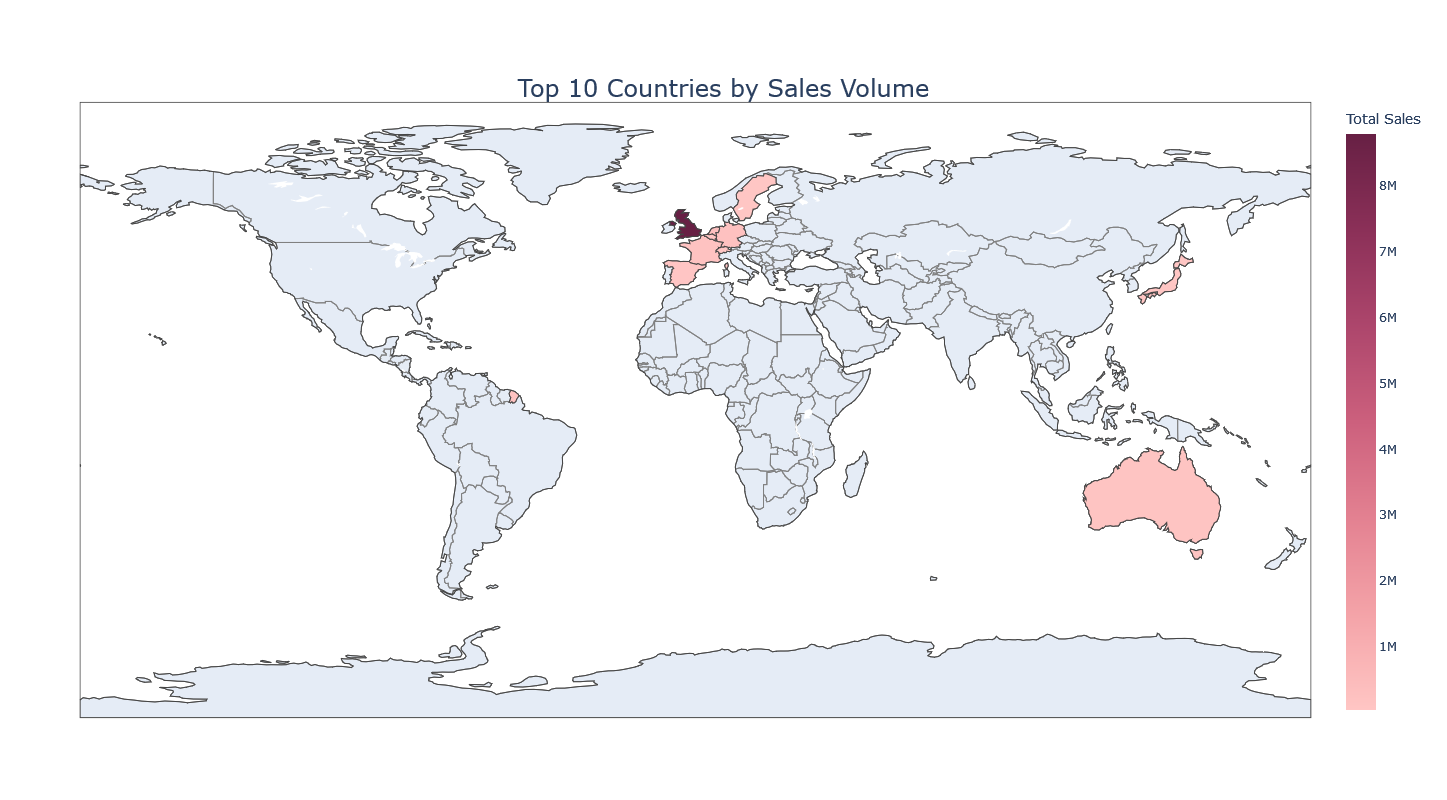

CustomerCountry  TotalTransactionValue
 United Kingdom             8794209.19
    Netherlands              284225.46
        Germany              227941.61
         France              209505.36
      Australia              136774.23
          Spain               61435.39
    Switzerland               56903.78
        Belgium               41038.21
         Sweden               38156.57
          Japan               36691.81


In [65]:
# Set the number of items to display
sales_benchmark = 10

# Group the dataset by 'CustomerCountry' and calculate the total sales for each country
sales_by_country = df.groupby('CustomerCountry')['TotalTransactionValue'].sum().reset_index()  # calculate total sales

# Select the top countries with the highest sales volume
top_countries = sales_by_country.nlargest(sales_benchmark, 'TotalTransactionValue')  # get top countries

# Create a choropleth map to visualize the sales distribution for the top countries
fig = px.choropleth(top_countries,  # data
                    locations='CustomerCountry',  # column with country names
                    locationmode="country names",  # specify that 'locations' contains country names
                    color='TotalTransactionValue',  # column with values to color-code
                    hover_name='CustomerCountry',  # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Burg,  # color scale
                    title=f'Sales Distribution by Country (Top {sales_benchmark})',  # chart title
                    labels={'TotalTransactionValue': 'Total Sales'}  # rename label
                   )

# Adjust the size of the map and increase the title size
fig.update_layout(
    autosize=False,  # disable automatic sizing
    width=1000,  # width of the figure in pixels
    height=800,  # height of the figure in pixels
    title={
        'text': f'Top {sales_benchmark} Countries by Sales Volume',  # chart title
        'y':0.9,  # y position of the title
        'x':0.5,  # x position of the title
        'xanchor': 'center',  # align the x position at the center of the title
        'yanchor': 'top',  # align the y position at the top of the title
        'font': dict(size=24)  # font size of the title
    }
)

# Set the color & borders for countries not in the top list
fig.update_geos(showcountries=True, countrycolor="Gray")  # set color for other countries

# Display the Map
fig.show()  # display the figure


# Display the Data
print(top_countries.to_string(index=False))